# ЛР №2
## Ремизов Дмитрий А-05-20



### Задача 2.1.
Методом простой итерации найти  вещественные корни алгебраического уравнения $F(x)=0$ с точностью $e=10^{-8}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

Уравнение: <br>
$1.6x^3-1.7x^2-10.45x+13.1=0$

Пишем определение функции $F(x)$ и ее производной $F'(x)$.
Задаем область определения, на которой находятся все корни уравнения, разбиваем отрезок на 1000 точек.

In [2]:
def F(x):
    return 1.6*x**3-1.7*x**2-10.45*x+13.1

def DF(x):
    return 1.6*3*x**2-1.7*2*x-10.45

a=-3
b=2.6
c=(a+b)/2
x_data=np.linspace(a,b, 1000)

Уравнение имеет 3 корня. <br>
Создаем рисунок из 6 графиков:<br> 
3 слева для графика функции на отрезках локализации каждого корня; <br>
3 справа для графика производной на этих же отрезках. <br>

С помощью циклов строим графики, задаем для каждого корня отрезок $[a_i,b_i]$,
такой, чтобы производная на всем отрезке была одного знака, рассматриваем каждый корень на соответствующем отрезке.<br>

С помощью циклов делаем легенды для графиков (подписи)

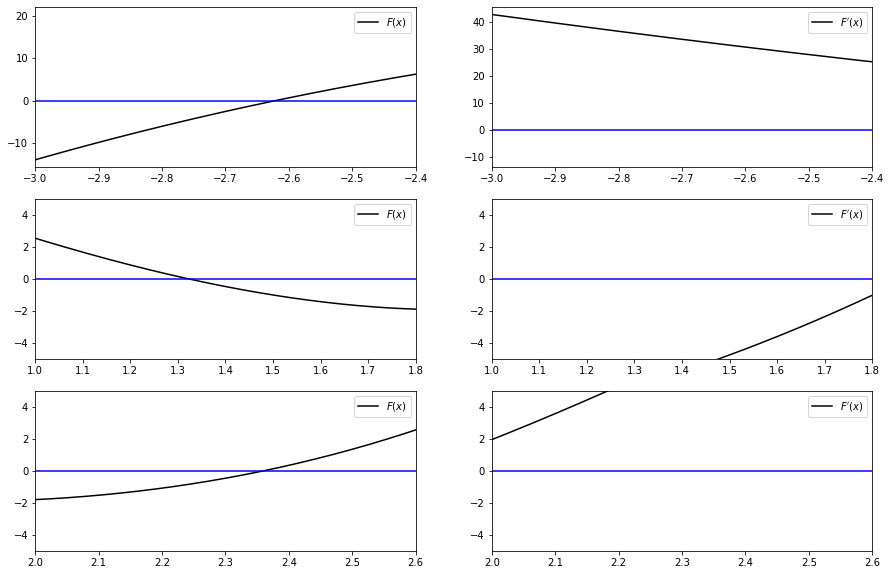

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

for i in range (0, 3):
    ax[i][0].plot(x_data, F(x_data), label='$F(x)$', color="black")
    ax[i][0].axhline(0, color="blue")

for i in range (0, 3):
    ax[i][1].plot(x_data, DF(x_data), label='$F\'(x)$', color="black")
    ax[i][1].axhline(0, color="blue")

a1=-3
b1=-2

a2=1
b2=1.8

a3=2
b3=2.6

for i in range(0, 2):
    ax[0][i].set(xlim=(a1, -2.4))
   # ax[0][i].set(ylim=(-10, 10))
    
for i in range(0, 2):
    ax[1][i].set(xlim=(a2, b2))
    ax[1][i].set(ylim=(-5, 5))
    
for i in range(0, 2):
    ax[2][i].set(xlim=(a3, b3))
    ax[2][i].set(ylim=(-5, 5))
    
for i in range (0, 3):
    for j in range (0, 2):
        ax[i][j].legend()
        


Пишем функцию для нахождения корней уравнения с заданной точностью по методу простой итерации.<br>
$x_{n+1}=x_n-AF(x_n)$<br>
$e=10^{-8}$<br> 
За условие остановки цикла возьмем $|x_{n+1}-x_n|<e$<br>

In [4]:
e=10**(-8)

def Simple(x_d, A):
    n=1
    res=x_d[0]
    while abs(x_d[n]-x_d[n-1])>=e:
        x_d.append(x_d[n]-A*F(x_d[n]))
        res=x_d[n+1]
        n+=1
    print("Корень с точностью", e, ": ", res)    
    print("Количество итераций: ", n-1)
    return res

По формулам $A_i=2/(M_i+m_i);  M_i=max(F'(x)); m_i=min(F'(x)); q_i=|(M_i-m_i)/(M_i+m_i)|, x {\in} [a_i, b_i]$ <br>
находим $A_i, M_i, m_i, q_i$ <br>
Находим корни с заданной точностью.<br>

In [5]:
M1=DF(a1)
m1=DF(b1)


A1=2/(M1+m1)
q1=abs((M1-m1)/(M1+m1))

print(M1, "|", m1, "|", A1, "|",q1)

x_d1=[a1, a1-A1*F(a1)]
print(x_d1, "\n")

S1=Simple(x_d1, A1)    


42.95 | 15.550000000000004 | 0.034188034188034185 | 0.4683760683760683
[-3, -2.5196581196581196] 

Корень с точностью 1e-08 :  -2.6210806002780913
Количество итераций:  7


In [6]:
M2=DF(b2)
m2=DF(a2)


A2=2/(M2+m2)
q2=abs((M2-m2)/(M2+m2))

print(M2, "|", m2, "|", A2, "|",q2)

x_d2=[a2, a2-A2*F(a2)]
print(x_d2, "\n")

S2=Simple(x_d2, A2)

-1.0179999999999971 | -9.049999999999999 | -0.19864918553833938 | 0.7977751291219711
[1, 1.5065554231227656] 

Корень с точностью 1e-08 :  1.3236398758788528
Количество итераций:  15


In [7]:
M3=DF(b3)
m3=DF(a3)

A3=2/(M3+m3)
q3=abs((M3-m3)/(M3+m3))

print(M3, "|", m3, "|", A3, "|",q3)

x_d3=[a3, a3-A3*F(a3)]
print(x_d3, "\n")
S3=Simple(x_d3, A3)

13.158000000000008 | 1.9500000000000028 | 0.13238019592268988 | 0.7418586179507544
[2, 2.2382843526608416] 

Корень с точностью 1e-08 :  2.359940723270308
Количество итераций:  8


Формируем таблицу из полученных данных:

|ФИО   |Группа|Вариант|               |      |   |Уравнение |   |
|------|:----:|:-----:|:-------------:|:----:|:-:|:--------:|:-:|
|Ремизов Дмитрий|А-05-20|22|| | |1.6x^3-1.7x^2-10.45x+13.1||
|Корни     |[a,b]   |M                  |m                 |A                   |q                 |Корень с заданной                                                                                                                      точностью   |коли                                                                                                                           чество                                                                                                                         итера                                                                                                                           ций|
|1-й корень|[-3, 2] |42.95              |15.550000000000004|0.034188034188034185|0.4683760683760683|-2.6210806002780913|7  |
|2-й корень|[1, 1.8]|-1.0179999999999971|-9.049999999999999|-0.19864918553833938|0.7977751291219711|1.3236398758788528 |15 |
|3-й корень|[2, 2.6]|13.158000000000008 |1.9500000000000028|0.13238019592268988 |0.7418586179507544|2.359940723270308  |8  |

### Задача 2.2.


Дано уравнение $f(x)=0$ Найти все  корни уравнения с заданной точностью $\epsilon=10^{-12} $ на указанном отрезке $[a,b]$. Для решения задачи использовать метод Ньютона и метод, указанный в индивидуальном варианте. Сравнить количество итераций, потребовавшихся для достижения заданной точности каждым методом.

           ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ
1. Локализовать корни уравнения.
2. Составить программу вычисления корня методом Ньютона, предусмотрев в ней подсчёт числа итераций.  Найти с заданной точностью e корни уравнения на указанном в задании отрезке [a,b].
3. Составить программу вычисления корня методом, указанным в индивидуальном варианте, предусмотрев в ней подсчёт числа итераций. Найти с заданной точностью $\epsilon$ те же  корни уравнения, что в п.2.
4. Сравнить результаты проведенных расчётов, сведя их в таблицу.
5. Модифицировать  методы так, чтобы каждый метод делал заданное количество итераций и на каждом шаге сохранял значение модуля невязки $r_n=|f(x_n)|$ . Методы должны возвращать массив, хранящий значения $r_n$. Для каждого корня вызвать модифицированные методы так, чтобы они проделали 10 итераций.  Построить  графики зависимости $r_n$ от $n$, $n=0..10$, в логарифмической шкале. Каждому корню должно соответствовать одно изображение, на котором нарисованы зависимости для двух методов. Полученный результат объясните.

Уравнение: $10^{-\sqrt{x}}-sin({\Pi}\sqrt{x})-0.9$  <br> 
Отрезок: $[0, 3]$ <br>

Пишем функцию для вычисления $F(x)$ и $F'(x)$<br>
Чтобы не возникало деления на 0 прибавляем машинное эпсилон к левому краю отрезка локализации.<br>
Разбиваем отрезок $[a, b]$ на 1000 точек

In [8]:
def F(x):
    return 10**(-x**(0.5))-np.sin(math.pi*x**(0.5))-0.9
def DF(x):
    return (-math.pi)*(np.cos(math.pi*x**(0.5)))/(2*x**(0.5))-(10**(-x**(0.5))*math.log(10))/(2*x**(0.5))

def m_eps(e):
    while e+1>1:
        e/=2
    return e

eps=m_eps(1.0)

a=0+eps
b=3
x_data=np.linspace(a,b,1000)



Строим графики на отрезках локализации корней

[(-0.1, 0.2)]

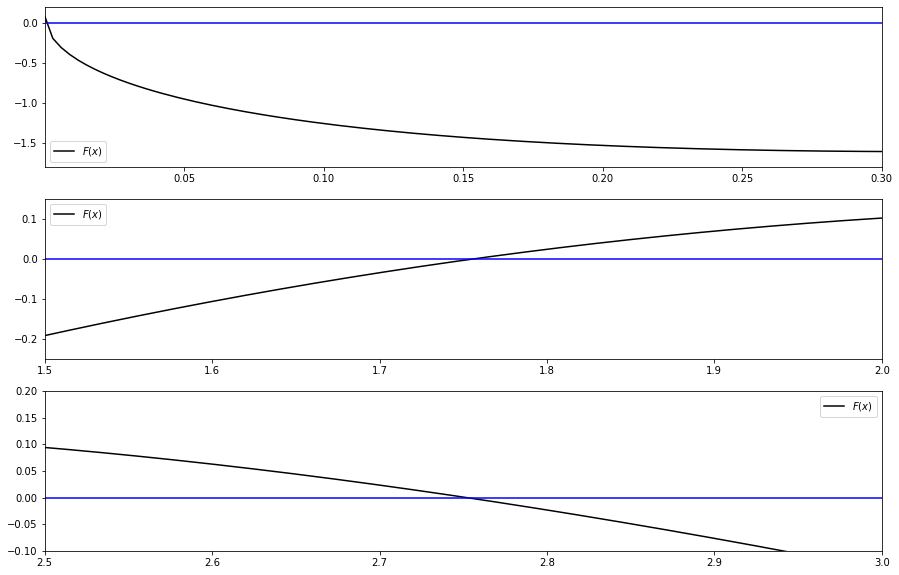

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

for i in range (3):
    ax[i].plot(x_data, F(x_data), label='$F(x)$', color="black")
    ax[i].axhline(0, color="blue")
    ax[i].legend()
    
a1=0.0001
b1=0.3

a2=1.5
b2=2

a3=2.5
b3=b


ax[0].set(xlim=(a1, b1))
ax[0].set(ylim=(-1.8,0.2))
    
ax[1].set(xlim=(a2, b2))
ax[1].set(ylim=(-0.25,0.15))
    
ax[2].set(xlim=(a3, b3))
ax[2].set(ylim=(-0.1, 0.2))
    

        

По формуле для метода Ньютона  $x_{n+1}=x_n-\frac{F(x_n)}{F'(x_n)}$ заполняем массив значениями для каждого из корней.<br>
Выводим корни с заданной точностью $\epsilon=10^{-12}$

In [10]:
def New(x_d, e):
    global k
    k=1
    while abs(x_d[k]-x_d[k-1])>e:
        x_d.append(x_d[k]-F(x_d[k])/DF(x_d[k]))
        k+=1
    print("Количество итераций: ", k)
    return(x_d)

e=10**(-12)

Nx_d1=[a1, a1-F(a1)/DF(a1)]

Nx_d2=[a2, a2-F(a2)/DF(a2)]

Nx_d3=[a3, a3-F(a3)/DF(a3)]

k=0
New(Nx_d1, e)
print("1-й корень уравнения с точноcтью ", e,": ", Nx_d1[k] , '\n')

New(Nx_d2, e)
print("2-й корень уравнения с точноcтью ", e,": ", Nx_d2[k] , '\n')

New(Nx_d3, e)
print("3-й корень уравнения с точноcтью ", e,": ", Nx_d3[k] , '\n')

Количество итераций:  5
1-й корень уравнения с точноcтью  1e-12 :  0.0003437056247207294 

Количество итераций:  6
2-й корень уравнения с точноcтью  1e-12 :  1.7557023174474422 

Количество итераций:  6
3-й корень уравнения с точноcтью  1e-12 :  2.751734381134941 



Подбираем отрезки локализации корней таким образом, чтобы производная функции не меняла знак на отрезках.<br>
Рисуем график для каждого корня

[(-0.9, 1.0)]

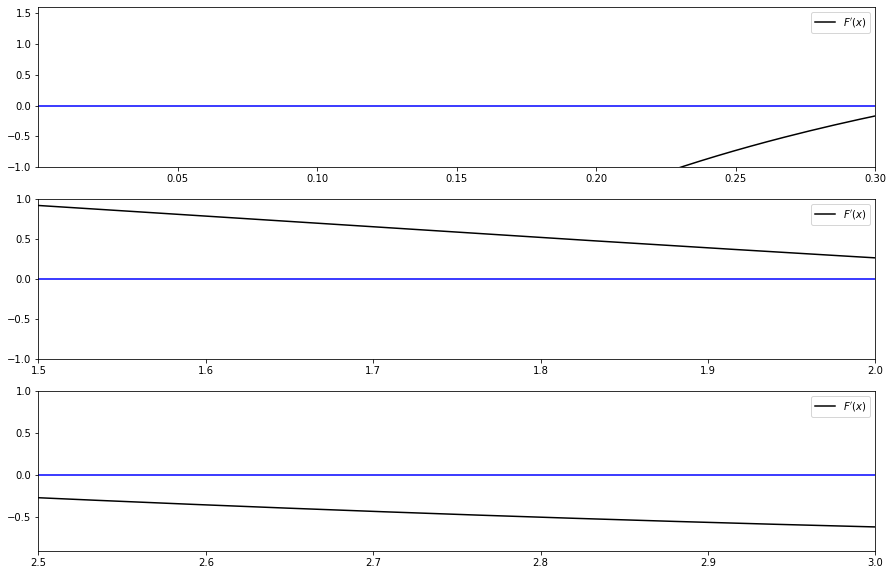

In [11]:
fig, ax=plt.subplots(3, 1, figsize=(15, 10))

for i in range(3):
    ax[i].plot(x_data, DF(x_data), label='$F\'(x)$', color="black")
    ax[i].axhline(0, color="blue")
    ax[i].legend()

a1=0.0001
b1=0.3

a2=1.5
b2=2

a3=2.5
b3=b

ax[0].set(xlim=(a1, b1))
ax[0].set(ylim=(-1, 1.6))

ax[1].set(xlim=(a2, b2))
ax[1].set(ylim=(-1, 1))

ax[2].set(xlim=(a3, b3))
ax[2].set(ylim=(-0.9, 1))

Пишем функцию для нахождения корней уравнения с заданной точностью по методу простой итерации.<br>
$x_{n+1}=x_n-AF(x_n)$<br>
$e=10^{-8}$<br> 
За условие остановки цикла возьмем $|x_{n+1}-x_n|<e$<br>
Заполняем массив значениями $x_i$. <br> <br>
По формулам $A_i=2/(M_i+m_i);  M_i=max(F'(x)); m_i=min(F'(x)); q_i=|(M_i-m_i)/(M_i+m_i)|, x {\in} [a_i, b_i]$ <br>
находим $A_i, M_i, m_i, q_i$ <br>
Находим корни с заданной точностью.<br><br>
Сводим результаты вычислений обоих методов в таблицу. 

In [12]:
def Simp(x_d, A, e):
    global k
    k=1
    while abs(x_d[k]-x_d[k-1])>e:
        x_d.append(x_d[k]-A*F(x_d[k]))
        k+=1
    print("Количество итераций: ", k)
    return(x_d)

e=10**(-12)

M1=DF(b1)
m1=DF(a1)
A1=2/(M1+m1)
Sx_d1=[a1, a1-A1*F(a1)]


M2=DF(a2)
m2=DF(b2)
A2=2/(M2+m2)
Sx_d2=[a2, a2-A2*F(a2)]

M3=DF(a3)
m3=DF(b3)
A3=2/(M3+m3)
Sx_d3=[a3, a3-A3*F(a3)]

k=0
Simp(Sx_d1, A1, e)
print("1-й корень уравнения с точноcтью ", e,": ", Sx_d1[k] , '\n')

Simp(Sx_d2, A2, e)
print("2-й корень уравнения с точноcтью ", e,": ", Sx_d2[k] , '\n')

Simp(Sx_d3, A3, e)
print("3-й корень уравнения с точноcтью ", e,": ", Sx_d3[k] , '\n')

Количество итераций:  8
1-й корень уравнения с точноcтью  1e-12 :  0.00034370562470575303 

Количество итераций:  10
2-й корень уравнения с точноcтью  1e-12 :  1.755702317447443 

Количество итераций:  11
3-й корень уравнения с точноcтью  1e-12 :  2.751734381134935 



|Уравнение:            |$10^{-\sqrt{x}}-sin({\Pi}\sqrt{x})-0.9$|              |
| -------------------- |:-------------------------------------:|:------------:|
|Формула м. Ньютона:   |$x_{n+1}=x_n-\frac{F(x_n)}{F'(x_n)}$   |              |
|Формула м. Пр. итер.: |$x_{n+1}=x_n-AF(x_n)$                  |              |
|Задача 2.2            |                                       |              |
|Корни уравнения       |Число итераций м. Ньютона              |Число итераций                                                                 м. Пр. итер.  |
|0.000343705625        |5                                      |8             |
|1.755702317448        |6                                      |10            |
|2.751734381135        |6                                      |11            |

Пишем модифицированные функции для обоих методов, в которых фиксированное заданное число итераций, результатом функций является массив значений модуля невязки $r_n=|f(x_n)|$. $n=0, 1, .., 10$

In [13]:
def New_2(x_d):
    global k
    k=1
    y_d=[F(x_d[0])]
    for i in range(10):
        x_d.append(x_d[k]-F(x_d[k])/DF(x_d[k]))
        y_d.append(abs(F(x_d[k+1])))
        k+=1
    print("Количество итераций: ", k-1)
    return(y_d)

def Simp_2(x_d, A):
    global k
    k=1
    y_d=[F(x_d[0])]
    for i in range (10):
        x_d.append(x_d[k]-A*F(x_d[k]))
        y_d.append(abs(F(x_d[k+1])))
        k+=1
    print("Количество итераций: ", k-1)
    return(y_d)

Nx_d1=[a1, a1-F(a1)/DF(a1)]
Sx_d1=[a1, a1-A1*F(a1)]

Для каждого из корней рисуем график зависимости $r_n$ от $n$, $n=0..10$, в логарифмической шкале.<br>

Количество итераций:  10
Количество итераций:  10


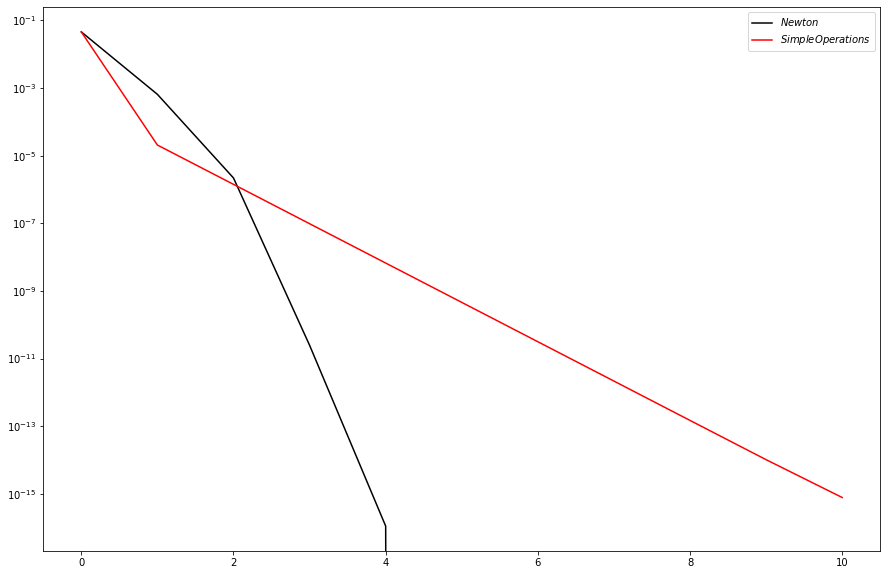

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.plot([i for i in range (11)], New_2(Nx_d1), label='$Newton$', color="black")
ax.plot([i for i in range (11)], Simp_2(Sx_d1, A1), label='$Simple Operations$', color="red")
plt.yscale('log')
ax.legend()

Количество итераций:  10
Количество итераций:  10


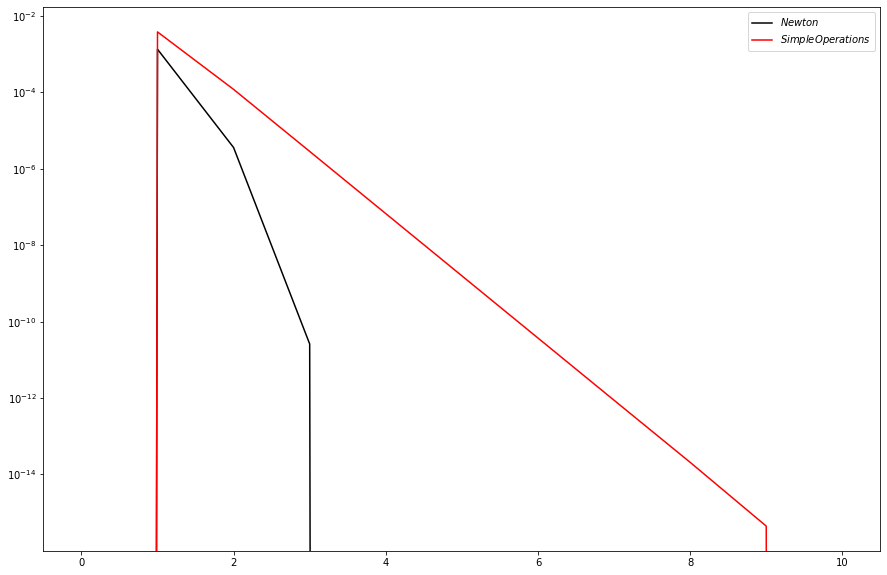

In [15]:
Nx_d2=[a2, a2-F(a2)/DF(a2)]
Sx_d2=[a2, a2-A2*F(a2)]

fig, ax = plt.subplots(1, figsize=(15, 10))
ax.plot([i for i in range (11)], New_2(Nx_d2), label='$Newton$', color="black")
ax.plot([i for i in range (11)], Simp_2(Sx_d2, A2), label='$Simple Operations$', color="red")
plt.yscale('log')
ax.legend()

Количество итераций:  10
Количество итераций:  10


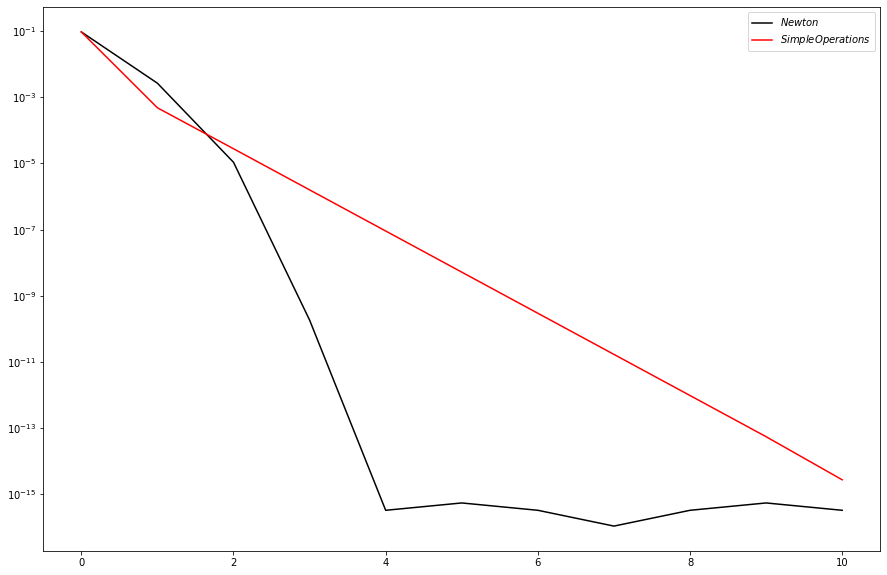

In [16]:
Nx_d3=[a3, a3-F(a3)/DF(a3)]
Sx_d3=[a3, a3-A3*F(a3)]

fig, ax = plt.subplots(1, figsize=(15, 10))
ax.plot([i for i in range (11)], New_2(Nx_d3), label='$Newton$', color="black")
ax.plot([i for i in range (11)], Simp_2(Sx_d3, A3), label='$Simple Operations$', color="red")
plt.yscale('log')
ax.legend()

# Вывод:<br>
По графикам для каждого корня и по таблице можно заметить, что сходимость метода простых итераций (красный цвет) линейна, а сходимость метода Ньютона (черный цвет) крадратична (половина параболы). Т.е. методу Ньютона требуется меньше итераций для нахождения значения корня с заданной точностью.

#### Задача 2.3 . Найти корни уравнения и определить их кратность.
Уравнение: $800arctg(\frac{4x-11}{5x+21})-168x+16x^2+341$ <br><br>
Пишем функции для вычисления функции и первой произовдной.<br>
По графику определяем отрезок, на котором находятся оба корня.<br>
Разбиваем отрезок для построения графика на 1000 частей.

In [17]:
def F(x):
    return 800*np.arctan((4*x-11)/(5*x+21))-168*x+16*x**2+341
def DF(x):
    return 32*x-168+111200/(41*x**2+122*x+562)

a=-4
b=3
x_data=np.linspace(a, b, 100)

Строим графики на отрезках локализации. Для каждого корня свой график.

[(2.5, 3.0)]

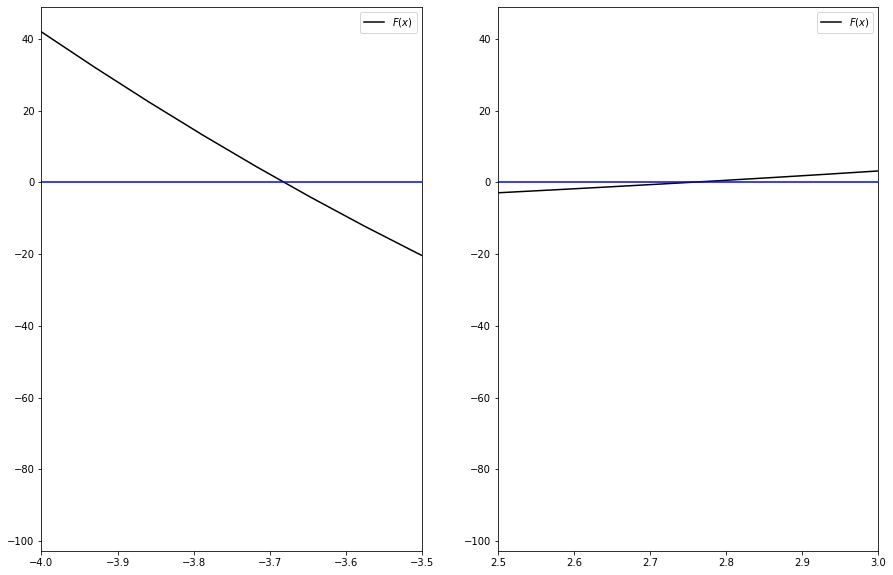

In [18]:
fig, ax =plt.subplots(1, 2, figsize=(15, 10))

a1=-4
b1=-3.5

a2=2.5
b2=3

for i in range(2):
    ax[i].plot(x_data, F(x_data), label='$F(x)$', color="black")
    ax[i].axhline(0, color="blue")
    ax[i].legend()
    
ax[0].set(xlim=(a1, b1))
ax[1].set(xlim=(a2, b2))

С помощью функции для метода Ньютона из задачи $2.2$ вычисляем корни с точностью $\epsilon=10^{-12}$ 

In [19]:
e=10**(-12)
x_d1=[a1, a1-F(a1)/DF(a1)]
x_d2=[a2, a2-F(a2)/DF(a2)]

k=0
New(x_d1, e)
print("1-й корень уравнения с точноcтью ", e,": ", x_d1[k] , '\n')
x1=x_d1[k]

New(x_d2, e)
print("2-й корень уравнения с точноcтью ", e,": ", x_d2[k] , '\n')
x2=x_d2[k]

Количество итераций:  5
1-й корень уравнения с точноcтью  1e-12 :  -3.681017895394688 

Количество итераций:  5
2-й корень уравнения с точноcтью  1e-12 :  2.7499999999999996 



Подставляем корни $x_1, x_2$ в $F(x)$ и $F'(x)$. Если значение производная $F^{(n)}(x_i)!=0$, $n=0, 1, ..., n$ останавливаемся, в противном случае вычисляем производную дальше. $n$ -- кратность корня $x_i$.<br>

Т.к. корень считаем с приближением, считаем, что если $|F^{(n)}(x_i)|<\epsilon$, то $F^{(n)}(x_i)=0$

In [24]:
print("F(x1)", abs(F(x1))<e, F(x1))
print("F(x2)", abs(F(x2))<e, F(x2))
print("F'(x1)", abs(DF(x1))<e, DF(x1))
print("F'(x2)", abs(DF(x2))<e, DF(x1))

F(x1) True -2.2737367544323206e-13
F(x2) True -5.684341886080802e-14
F'(x1) False -119.44041412863612
F'(x2) False -119.44041412863612


$n=1$ => кратность корней = 1.

In [5]:
x=15.324
y=13.538
d=0.0005
Df =abs(m.sin(y) + y*m.cos(x))*d +abs(m.sin(x)+x*m.cos(y))*d
df=Df/abs(x*m.sin(y)+y*m.sin(x))
print("df: ", df)


df:  0.0005851051554048867
